## Regression Coefficients are affected by regularisation

**Regularisation applies a penalty on the coefficients**, in order to **reduce their influence** and **create models that generalise better**. This is very good to **improve  model performance**. However, it **masks the true relationship between the predictor X and the outcome Y**. Let's explore **why.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('dataset_2.csv')
data.shape

(50000, 109)

In [3]:
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((35000, 108), (15000, 108))

Let's fit a few logistic regression models with **decreasing values for the penalty of the regularisation.**

**Train 4 different models, decreasing the amount of regularisation** (that is, increasing C)! **First store the coefficients of the variables** fitted for each different model!

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)
coefs_df = []
penalties = [0.00005, 0.0005, 0.005, 0.05, 0.5]
for c in penalties:   
    logit = LogisticRegression(C=c, penalty='l2', random_state=10, max_iter=300)
    logit.fit(scaler.transform(X_train), y_train)
    coefs_df.append(pd.Series(logit.coef_.ravel())) # Store the coefficients!

Create a **dataframe with the coefficients** for all the variables for the 4 different **logistic regression models!**

In [7]:
coefs = pd.concat(coefs_df, axis=1)
coefs.columns = penalties
coefs.index = X_train.columns
coefs.head()

,0.00005,0.00050,0.00500,0.05000,0.50000
var_1,0.002746,0.005288,0.007366,0.011095,0.011663
var_2,-0.005650,-0.010763,-0.012708,-0.012866,-0.013291
var_3,0.000971,-0.002668,0.007178,0.061188,0.101370
var_4,0.001327,-0.002046,0.001087,0.020369,0.026001
var_5,0.002923,0.008070,0.025891,0.039422,0.042838


**Apply log scale to the penalties (simplifies comparison)!**

In [8]:
coefs.columns = np.log(penalties)
coefs.head()

,-9.903488,-7.600902,-5.298317,-2.995732,-0.693147
var_1,0.002746,0.005288,0.007366,0.011095,0.011663
var_2,-0.005650,-0.010763,-0.012708,-0.012866,-0.013291
var_3,0.000971,-0.002668,0.007178,0.061188,0.101370
var_4,0.001327,-0.002046,0.001087,0.020369,0.026001
var_5,0.002923,0.008070,0.025891,0.039422,0.042838


**Plot the change in coefficients with the penalty!**

Text(0.5, 1.0, 'Coefficient value vs penalty. Each line corresponds to one variable')

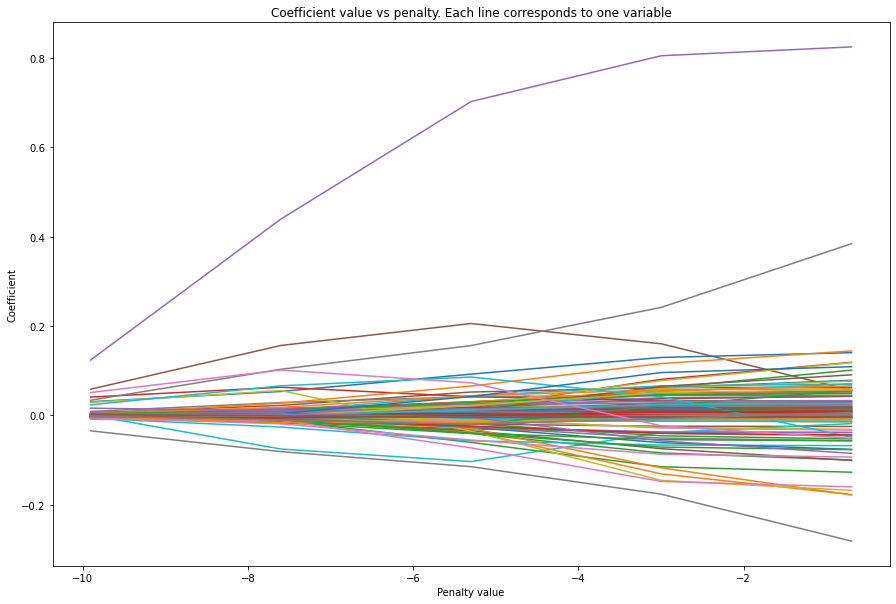

In [9]:
coefs.T.plot(figsize=(15,10), legend=False)
plt.xlabel('Penalty value')
plt.ylabel('Coefficient')
plt.title('Coefficient value vs penalty. Each line corresponds to one variable')

**Plot only the first 10 features for better visualisation!**

Text(0.5, 1.0, 'Coefficient value vs penalty')

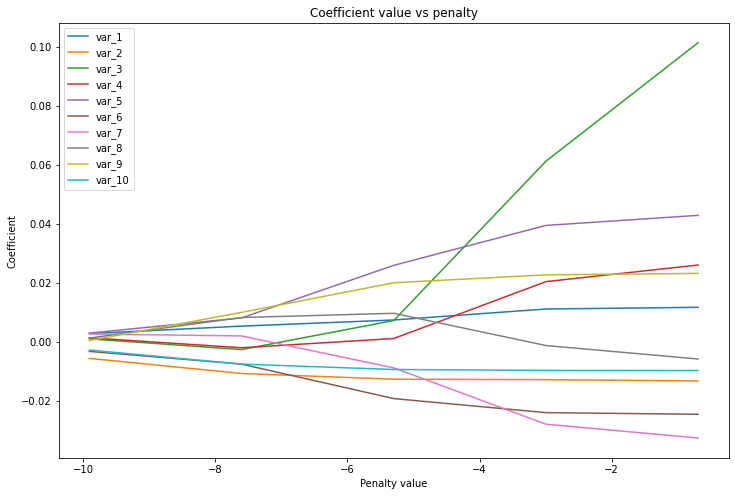

In [10]:
temp = coefs.head(10)
temp = temp.T
temp.plot(figsize=(12,8))
plt.xlabel('Penalty value')
plt.ylabel('Coefficient')
plt.title('Coefficient value vs penalty')

We can see that **the relation among the coefficients is complex**. Some features show **bigger coefficients than others** without regularisation, but when **the penalty increases this relationship changes.** Some other features are very important (show big coefficients) without regularisation, but with regularization their importance is similar to that of other features. While this is not crucial to selet features, this is actually quite important when **our aim is to understand the true relationship of a variable with the target.** Or in other words, when **we need to interpret and fully understand the outcome of the Linear Regression.**

**Plot another 10 features for visualisation!**

Text(0.5, 1.0, 'Coefficient value vs penalty')

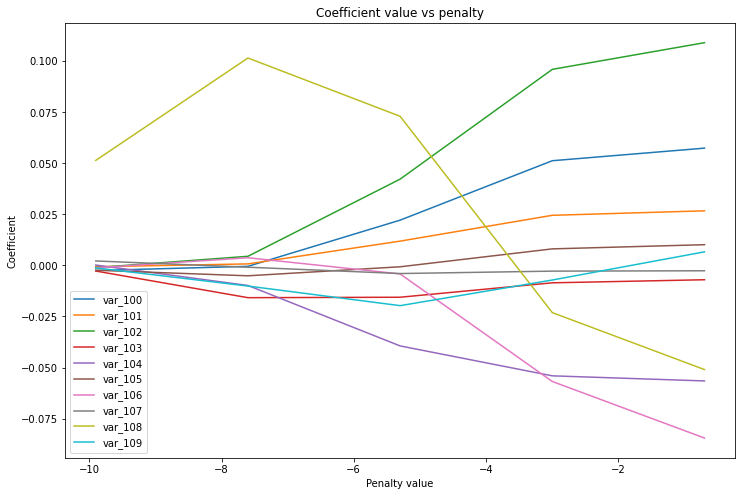

In [11]:
temp = coefs.tail(10)
temp = temp.T
temp.plot(figsize=(12,8))
plt.xlabel('Penalty value')
plt.ylabel('Coefficient')
plt.title('Coefficient value vs penalty')

Same as before, the **relationship between features**, as inferred **from the coefficients**, changes depending on **the level of regularisation.**